<a href="https://colab.research.google.com/github/koDELLL/MachineLearingWeek1/blob/main/Multiple%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 50_Startups.csv to 50_Startups.csv
5 baris pertama dari dataset:
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
Mean Squared Error 

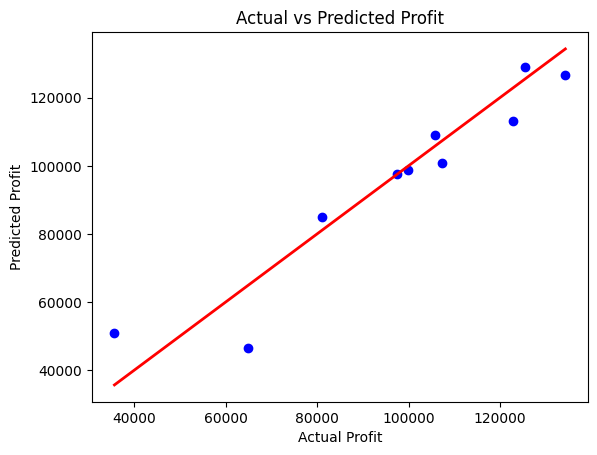

In [1]:
# Langkah 1: Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Langkah 2: Unggah dataset
from google.colab import files
uploaded = files.upload()

# Langkah 3: Memuat dataset
# Membaca file CSV ke dalam DataFrame pandas
import io
data = pd.read_csv(io.BytesIO(uploaded['50_Startups.csv']))

# Langkah 4: Tampilkan beberapa baris pertama dataset
print("5 baris pertama dari dataset:")
print(data.head())

# Langkah 5: Pra-pemrosesan data
# Jika ada kolom kategorikal (seperti 'State'), kita perlu mengubahnya menjadi nilai numerik
# Misalnya, kolom 'State' bisa mengandung kategori, kita akan menggunakan LabelEncoder

# Mengecek apakah ada kolom kategorikal
print("Info dataset:")
print(data.info())

# Mengubah kolom kategorikal menjadi numerik (misalnya, 'State')
# Asumsi: Ada kolom 'State' yang kategorikal
labelencoder = LabelEncoder()
data['State'] = labelencoder.fit_transform(data['State'])

# Langkah 6: Pisahkan fitur dan target
# Fitur (X): R&D Spend, Administration, Marketing Spend, State
# Target (y): Profit
X = data[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = data['Profit']

# Langkah 7: Membagi data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Langkah 8: Melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Langkah 9: Membuat prediksi menggunakan data test
y_pred = model.predict(X_test)

# Langkah 10: Evaluasi model
# Menghitung Mean Squared Error (MSE) dan R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")

# Langkah 11: Tampilkan koefisien model
# Menampilkan koefisien dan intercept dari model regresi
print("Koefisien model:", model.coef_)
print("Intercept:", model.intercept_)

# Visualisasi hasil prediksi vs aktual
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Profit')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.show()
